In [1]:
import torch
import random
import numpy as np

import matplotlib.pyplot as plt

from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.blocc import blocc
from algorithms.pbgd_free import pbgd_free
from algorithms.bic_gaffa import bic_gaffa

from utils import *

In [2]:
plt.rcParams.update({'font.size': 26})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['lines.linewidth'] = 8  # Set default line width to 2

In [3]:
def set_seed(seed):
    torch.manual_seed(seed)                # Sets seed for CPU
    torch.cuda.manual_seed(seed)          # Sets seed for current GPU
    torch.cuda.manual_seed_all(seed)      # Sets seed for all GPUs (if using multi-GPU)
    np.random.seed(seed)                  # Sets seed for NumPy
    random.seed(seed)                     # Sets seed for Python's random module

    # Ensures deterministic behavior (may impact performance)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

epochs = 50
seeds = 20

In [4]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'blocc': {
        'gam': 15.,
        'eta': 0.005,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.005,
        'eta1F': 0.005,
        'eta2g': 0.001,
        'eta2F': 0.001
    },
    'pbgd_free': {
        'gam': 15.,
        'eta': 0.005,
        'T': 10,
        'Ty': 5,
        'eta1g': 0.005,
        'eta1F': 0.005,
        'eta2g': 0.001,
        'eta2F': 0.001
    },
    'bic_gaffa': {
        'alpha': 0.001,
        'gama1': 10.,
        'gama2': 1.,
        'yita': 0.01,
        'p': 0.3
    }
}

# Dataset Diabetes

In [5]:
dataset_name = "diabetes"
data = load_diabetes()

n_train = 500
n_val = 150
seeds=3

In [6]:
metrics_diabetes = {}
variables_diabetes = {}

algs = ['pbgd_free', 'blocc','bic_gaffa' , 'lv_hba', 'gam',] # 
# algs = ['blocc'] # 
for a in algs:
    metrics_diabetes[a] = []
    variables_diabetes[a] = []

for seed in range(seeds):
    set_seed(seed)
    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_diabetes[alg].append(metrics_seed)
        variables_diabetes[alg].append(variables_seed)
    print("DONE")

Starting seed 1/3: pbgd_free blocc bic_gaffa 

/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x_train),
/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train))
/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x_val),
/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:104: UserWarning: To copy construct from a tensor,

lv_hba gam DONE
Starting seed 2/3: pbgd_free blocc bic_gaffa 

/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x_train),
/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train))
/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(x_val),
/Users/liuyuan/Documents/URochester/jmlr/SVM/algorithms/bic_gaffa.py:104: UserWarning: To copy construct from a tensor,

lv_hba gam DONE
Starting seed 3/3: pbgd_free blocc bic_gaffa lv_hba gam DONE


## Evaluation

In [7]:
results_path = f'Plots_{dataset_name}/'

In [8]:
metrics_lvhba = metrics_diabetes['lv_hba']
metrics_gam = metrics_diabetes['gam']
metrics_bic_gaffa = metrics_diabetes['bic_gaffa']
metrics_blocc = metrics_diabetes['blocc']
metrics_pbgd_free = metrics_diabetes['pbgd_free']



axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
axis_bic_gaffa = np.array([[x['time_computation'] for x in metric] for metric in metrics_bic_gaffa]).mean(0)
axis_blocc = np.array([[x['time_computation'] for x in metric] for metric in metrics_blocc]).mean(0)
axis_pbgd_free = np.array([[x['time_computation'] for x in metric] for metric in metrics_pbgd_free]).mean(0)

# Shift all axes so that the first timestamp is 0
axis_lvhba -= axis_lvhba[0]
axis_gam -= axis_gam[0]
axis_bic_gaffa -= axis_bic_gaffa[0]

axis_blocc -= axis_blocc[0]
axis_pbgd_free -= axis_pbgd_free[0]

axis_iter = np.arange(epochs)


In [9]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
train_acc_blocc = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_blocc])
train_acc_pbgd_free = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_pbgd_free])
train_acc_bic_gaffa = np.array([[x['train_acc'] for x in metric] for metric in metrics_bic_gaffa])


val_acc_lvhba = np.array([[x['val_acc'] for x in metric] for metric in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metric] for metric in metrics_gam])
val_acc_blocc = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_blocc])
val_acc_pbgd_free = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_pbgd_free])
val_acc_bic_gaffa = np.array([[x['val_acc'] for x in metric] for metric in metrics_bic_gaffa])

test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
test_acc_blocc = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_blocc])
test_acc_pbgd_free = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_pbgd_free])
test_acc_bic_gaffa = np.array([[x['test_acc'] for x in metric] for metric in metrics_bic_gaffa])

In [10]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metric] for metric in metrics_gam])[:,0:]
val_loss_blocc = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_blocc])[:,0:]
val_loss_pbgd_free = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_pbgd_free])[:,0:]
val_loss_bic_gaffa = np.array([[x['val_loss'] for x in metric] for metric in metrics_bic_gaffa])[:,0:]

test_loss_bic_gaffa = np.array([[x['test_loss'] for x in metric] for metric in metrics_bic_gaffa])[:,0:]
lower_loss_bic_gaffa = np.array([[x['loss_lower'] for x in metric] for metric in metrics_bic_gaffa])[:,1:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metric] for metric in metrics_gam])[:,0:]
test_loss_blocc = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_blocc])[:,0:]
test_loss_pbgd_free = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_pbgd_free])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metric] for metric in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metric] for metric in metrics_gam])[:,1:]
lower_loss_blocc = np.array([[x['loss_lower'] for x in metric] for metric in metrics_blocc])[:,1:]
lower_loss_pbgd_free = np.array([[x['loss_lower'] for x in metric] for metric in metrics_pbgd_free])[:,1:]

In [11]:
import numpy as np

# Store full run-wise time histories (not averaged yet)
axes = {
    "LVHBA": np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]),
    "GAM": np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]),
    "BIC-GAFFA": np.array([[x['time_computation'] for x in metric] for metric in metrics_bic_gaffa]),
    "BLOCC": np.array([[x['time_computation'] for x in metric] for metric in metrics_blocc]),
    "PBGD-Free": np.array([[x['time_computation'] for x in metric] for metric in metrics_pbgd_free]),
}

test_accs = {
    "LVHBA": test_acc_lvhba,
    "GAM": test_acc_ga,
    "BIC-GAFFA": test_acc_bic_gaffa,
    "BLOCC": test_acc_blocc,
    "PBGD-Free": test_acc_pbgd_free,
}

print("==== Final Results (last iteration) ====\n")
for name in axes.keys():
    # Time cost per run at last iteration
    time_last = axes[name][:, -1]
    
    # Test accuracy per run at last iteration
    acc_last = test_accs[name][:, -1]
    
    print(f"{name:10s} | "
          f"Test Acc = {acc_last.mean():.4f} ± {acc_last.std():.4f} | "
          f"Time = {time_last.mean():.2f} ± {time_last.std():.2f}")


==== Final Results (last iteration) ====

LVHBA      | Test Acc = 0.7797 ± 0.0000 | Time = 2.48 ± 0.08
GAM        | Test Acc = 0.7090 ± 0.0080 | Time = 4.00 ± 0.06
BIC-GAFFA  | Test Acc = 0.7486 ± 0.0243 | Time = 0.30 ± 0.00
BLOCC      | Test Acc = 0.7740 ± 0.0144 | Time = 2.88 ± 0.07
PBGD-Free  | Test Acc = 0.7627 ± 0.0120 | Time = 0.24 ± 0.00


In [12]:
eps = 1e-4

val_losses = {
    "LVHBA": val_loss_lvhba,
    "GAM": val_loss_ga,
    "BIC-GAFFA": val_loss_bic_gaffa,
    "BLOCC": val_loss_blocc,
    "PBGD-Free": val_loss_pbgd_free,
}

time_axes = {
    "LVHBA": np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]),
    "GAM": np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]),
    "BIC-GAFFA": np.array([[x['time_computation'] for x in metric] for metric in metrics_bic_gaffa]),
    "BLOCC": np.array([[x['time_computation'] for x in metric] for metric in metrics_blocc]),
    "PBGD-Free": np.array([[x['time_computation'] for x in metric] for metric in metrics_pbgd_free]),
}

test_accs = {
    "LVHBA": test_acc_lvhba,
    "GAM": test_acc_ga,
    "BIC-GAFFA": test_acc_bic_gaffa,
    "BLOCC": test_acc_blocc,
    "PBGD-Free": test_acc_pbgd_free,
}

print("==== Results (stopping when val_loss stabilizes, eps=1e-4) ====\n")
for name in val_losses.keys():
    losses = val_losses[name]    # shape: (runs, epochs)
    times  = time_axes[name]     # shape: (runs, epochs)
    accs   = test_accs[name]     # shape: (runs, epochs)
    
    stop_times = []
    stop_accs  = []
    for run_losses, run_times, run_accs in zip(losses, times, accs):
        diffs = np.abs(np.diff(run_losses))
        idx = np.argmax(diffs < eps)  # first occurrence
        if diffs[idx] < eps:
            stop_times.append(run_times[idx+1])  # idx+1 aligns with diff
            stop_accs.append(run_accs[idx+1])
        else:
            stop_times.append(run_times[-1])
            stop_accs.append(run_accs[-1])
    
    stop_times = np.array(stop_times)
    stop_accs  = np.array(stop_accs)
    
    print(f"{name:10s} | "
          f"Test Acc = {stop_accs.mean():.4f} ± {stop_accs.std():.4f} | "
          f"Time = {stop_times.mean():.2f} ± {stop_times.std():.2f}")


==== Results (stopping when val_loss stabilizes, eps=1e-4) ====

LVHBA      | Test Acc = 0.7825 ± 0.0040 | Time = 2.35 ± 0.04
GAM        | Test Acc = 0.7090 ± 0.0080 | Time = 4.00 ± 0.06
BIC-GAFFA  | Test Acc = 0.7486 ± 0.0243 | Time = 0.30 ± 0.00
BLOCC      | Test Acc = 0.7740 ± 0.0144 | Time = 2.78 ± 0.06
PBGD-Free  | Test Acc = 0.7627 ± 0.0183 | Time = 0.12 ± 0.08


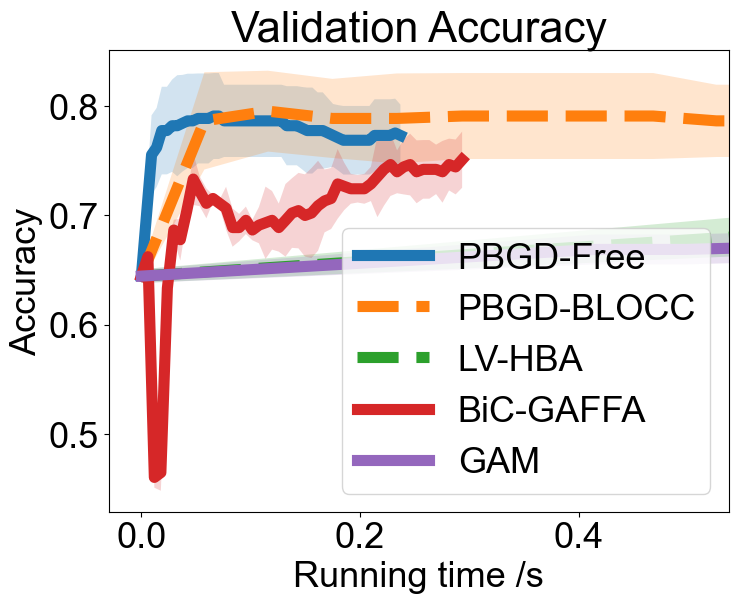

In [13]:
plt.figure(figsize=(8,6))

plt.plot(axis_pbgd_free,val_acc_pbgd_free.mean(0),'-',label="PBGD-Free")
plt.fill_between(axis_pbgd_free,val_acc_pbgd_free.mean(0)-val_acc_pbgd_free.std(0),val_acc_pbgd_free.mean(0)+val_acc_pbgd_free.std(0),alpha=0.2)

plt.plot(axis_blocc,val_acc_blocc.mean(0),'--',label="PBGD-BLOCC")
plt.fill_between(axis_blocc,val_acc_blocc.mean(0)-val_acc_blocc.std(0),val_acc_blocc.mean(0)+val_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'--',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_bic_gaffa, val_acc_bic_gaffa.mean(0), '-', label="BiC-GAFFA")
plt.fill_between( axis_bic_gaffa, val_acc_bic_gaffa.mean(0) - val_acc_bic_gaffa.std(0), val_acc_bic_gaffa.mean(0) + val_acc_bic_gaffa.std(0), alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend(loc="lower right")
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([-0.03,max(axis_pbgd_free)+0.3])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

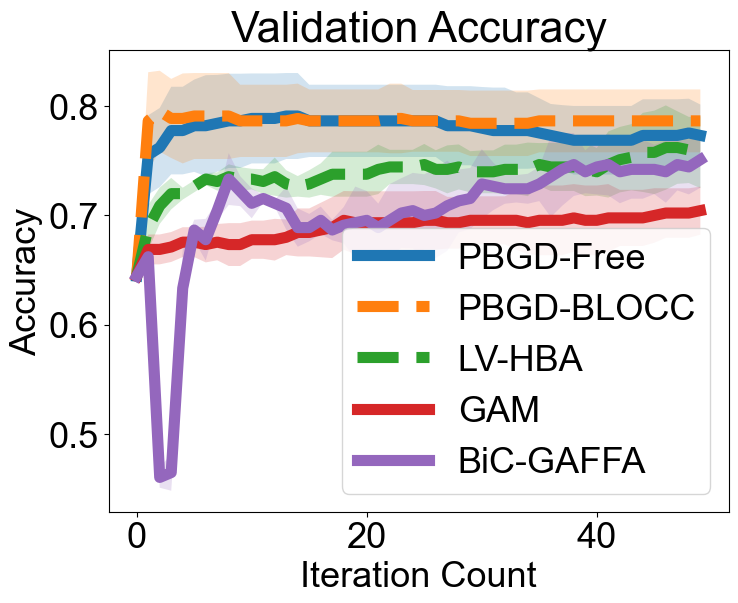

In [14]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_pbgd_free.mean(0),'-',label="PBGD-Free")
plt.fill_between(axis_iter,val_acc_pbgd_free.mean(0)-val_acc_pbgd_free.std(0),val_acc_pbgd_free.mean(0)+val_acc_pbgd_free.std(0),alpha=0.2)


plt.plot(axis_iter,val_acc_blocc.mean(0),'--',label="PBGD-BLOCC")
plt.fill_between(axis_iter,val_acc_blocc.mean(0)-val_acc_blocc.std(0),val_acc_blocc.mean(0)+val_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'--',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.plot(axis_iter, val_acc_bic_gaffa.mean(0), '-', label="BiC-GAFFA")
plt.fill_between(axis_iter, val_acc_bic_gaffa.mean(0) - val_acc_bic_gaffa.std(0), val_acc_bic_gaffa.mean(0) + val_acc_bic_gaffa.std(0), alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

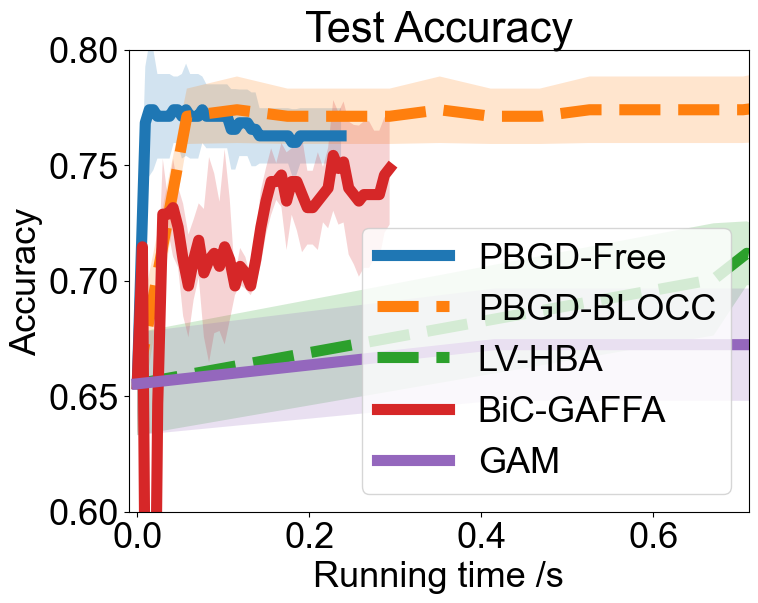

In [15]:
plt.figure(figsize=(8,6))


plt.plot(axis_pbgd_free,test_acc_pbgd_free.mean(0),'-',label="PBGD-Free")
plt.fill_between(axis_pbgd_free,test_acc_pbgd_free.mean(0)-test_acc_pbgd_free.std(0),test_acc_pbgd_free.mean(0)+test_acc_pbgd_free.std(0),alpha=0.2)

plt.plot(axis_blocc,test_acc_blocc.mean(0),'--',label="PBGD-BLOCC")
plt.fill_between(axis_blocc,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'--',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_bic_gaffa, test_acc_bic_gaffa.mean(0), '-', label="BiC-GAFFA")
plt.fill_between( axis_bic_gaffa, test_acc_bic_gaffa.mean(0) - test_acc_bic_gaffa.std(0), test_acc_bic_gaffa.mean(0) + test_acc_bic_gaffa.std(0), alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.ylim([0.6, 0.8])
plt.xlim([-0.01, max(axis_pbgd_free)*3])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

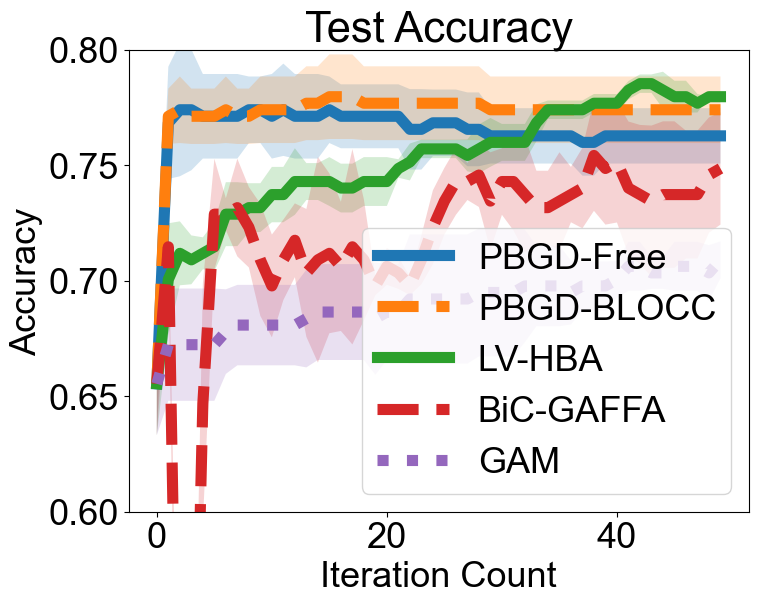

In [16]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_pbgd_free.mean(0),'-',label="PBGD-Free")
plt.fill_between(axis_iter,test_acc_pbgd_free.mean(0)-test_acc_pbgd_free.std(0),test_acc_pbgd_free.mean(0)+test_acc_pbgd_free.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_blocc.mean(0),'--',label="PBGD-BLOCC")
plt.fill_between(axis_iter,test_acc_blocc.mean(0)-test_acc_blocc.std(0),test_acc_blocc.mean(0)+test_acc_blocc.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter, test_acc_bic_gaffa.mean(0), '--', label="BiC-GAFFA")
plt.fill_between( axis_iter, test_acc_bic_gaffa.mean(0) - test_acc_bic_gaffa.std(0), test_acc_bic_gaffa.mean(0) + test_acc_bic_gaffa.std(0), alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),':',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.ylim([0.6, 0.8])
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

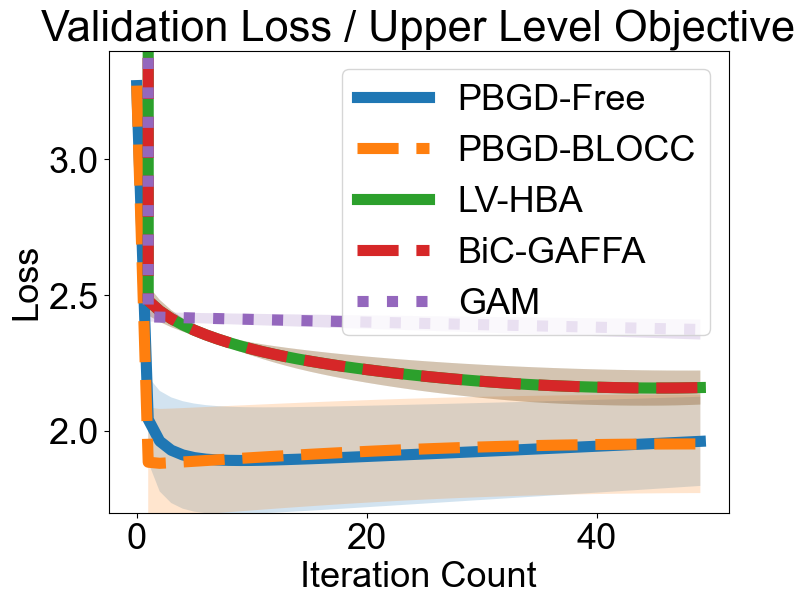

In [17]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_pbgd_free.mean(0),'-',label="PBGD-Free")
fill_dn_pbgd_free = val_loss_pbgd_free.mean(0)-val_loss_pbgd_free.std(0)
fill_up_pbgd_free = val_loss_pbgd_free.mean(0)+val_loss_pbgd_free.std(0)
plt.fill_between(iter_axis[1:],fill_dn_pbgd_free[1:],fill_up_pbgd_free[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_blocc.mean(0),'--',label="PBGD-BLOCC")
fill_dn_blocc = val_loss_blocc.mean(0)-val_loss_blocc.std(0)
fill_up_blocc = val_loss_blocc.mean(0)+val_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'--',label="BiC-GAFFA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),':',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.7,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

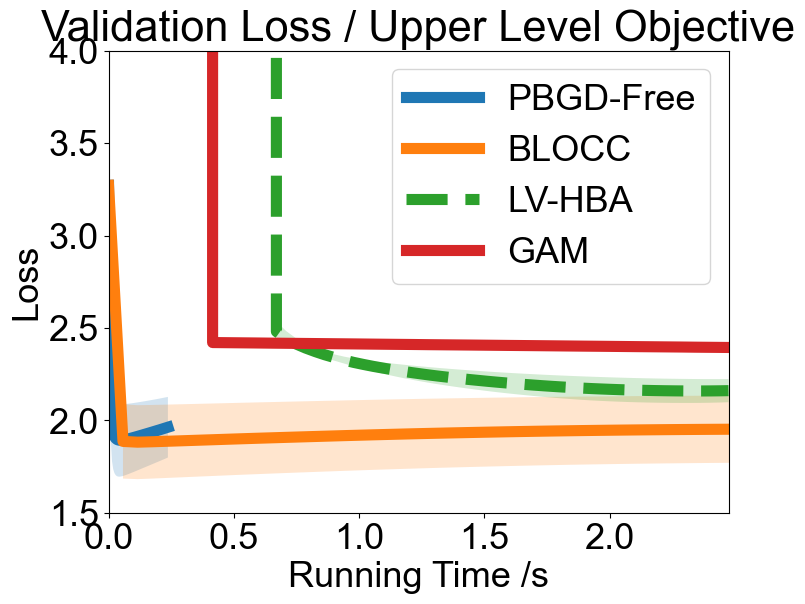

In [18]:
plt.figure(figsize=(8,6))

plt.plot(axis_pbgd_free,val_loss_pbgd_free.mean(0),'-',label="PBGD-Free")
fill_dn_pbgd_free = val_loss_pbgd_free.mean(0)-val_loss_pbgd_free.std(0)
fill_up_pbgd_free = val_loss_pbgd_free.mean(0)+val_loss_pbgd_free.std(0)
plt.fill_between(axis_pbgd_free[1:],fill_dn_pbgd_free[1:],fill_up_pbgd_free[1:],alpha=0.2)

plt.plot(axis_blocc,val_loss_blocc.mean(0),'-',label="BLOCC")
fill_dn_blocc = val_loss_blocc.mean(0)-val_loss_blocc.std(0)
fill_up_blocc = val_loss_blocc.mean(0)+val_loss_blocc.std(0)
plt.fill_between(axis_blocc[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'--',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

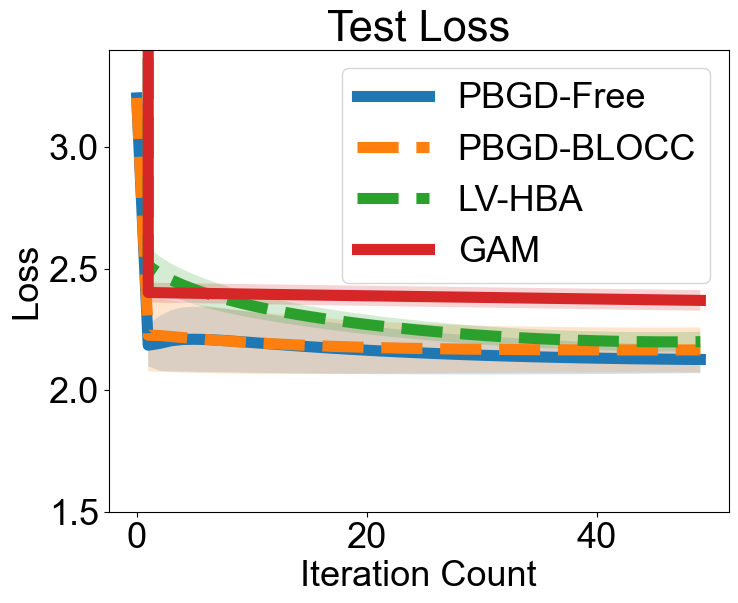

In [19]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_pbgd_free.mean(0),'-',label="PBGD-Free")
fill_dn_pbgd_free = test_loss_pbgd_free.mean(0)-test_loss_pbgd_free.std(0)
fill_up_pbgd_free = test_loss_pbgd_free.mean(0)+test_loss_pbgd_free.std(0)
plt.fill_between(iter_axis[1:],fill_dn_pbgd_free[1:],fill_up_pbgd_free[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_blocc.mean(0),'--',label="PBGD-BLOCC")
fill_dn_blocc = test_loss_blocc.mean(0)-test_loss_blocc.std(0)
fill_up_blocc = test_loss_blocc.mean(0)+test_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc[1:],fill_up_blocc[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'--',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

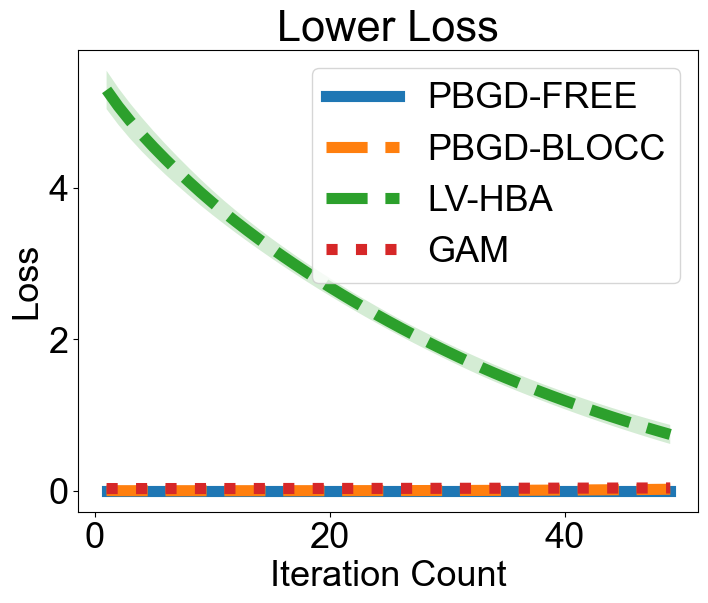

In [20]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_pbgd_free.mean(0),'-',label="PBGD-FREE")
fill_dn_pbgd_free = lower_loss_pbgd_free.mean(0)-lower_loss_pbgd_free.std(0)
fill_up_pbgd_free = lower_loss_pbgd_free.mean(0)+lower_loss_pbgd_free.std(0)
plt.fill_between(iter_axis[1:],fill_dn_pbgd_free,fill_up_pbgd_free,alpha=0.2)


plt.plot(iter_axis[1:],lower_loss_blocc.mean(0),'--',label="PBGD-BLOCC")
fill_dn_blocc = lower_loss_blocc.mean(0)-lower_loss_blocc.std(0)
fill_up_blocc = lower_loss_blocc.mean(0)+lower_loss_blocc.std(0)
plt.fill_between(iter_axis[1:],fill_dn_blocc,fill_up_blocc,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'--',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.plot(iter_axis[1:],lower_loss_bic_gaffa.mean(0),'--',label="BIC-GAFFA")
# fill_dn_bic_gaffa = lower_loss_bic_gaffa.mean(0)-lower_loss_bic_gaffa.std(0)
# fill_up_bic_gaffa = lower_loss_bic_gaffa.mean(0)+lower_loss_bic_gaffa.std(0)
# plt.fill_between(iter_axis[1:],fill_dn_bic_gaffa,fill_up_bic_gaffa,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),':',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
plt.title('Lower Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

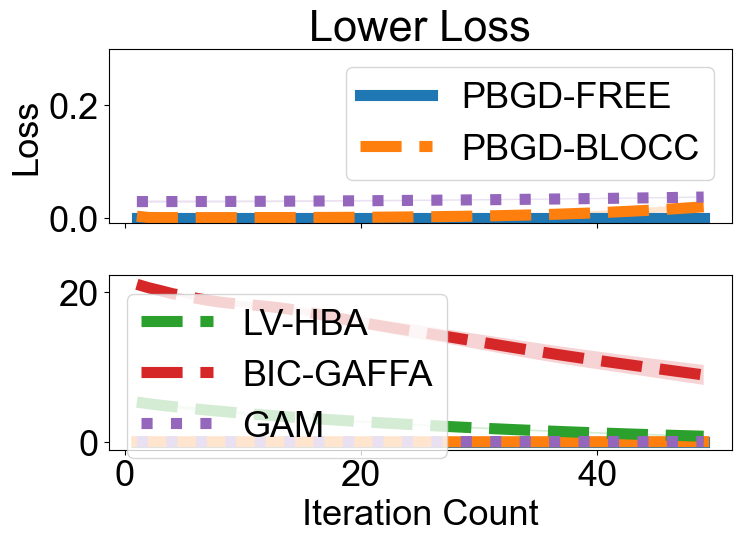

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# ---- Upper Plot (Regular) ----
axs[0].plot(iter_axis[1:], lower_loss_pbgd_free.mean(0), '-', label="PBGD-FREE")
axs[0].fill_between(iter_axis[1:],
                    lower_loss_pbgd_free.mean(0)-lower_loss_pbgd_free.std(0),
                    lower_loss_pbgd_free.mean(0)+lower_loss_pbgd_free.std(0),
                    alpha=0.2)

axs[0].plot(iter_axis[1:], lower_loss_blocc.mean(0), '--', label="PBGD-BLOCC")
axs[0].fill_between(iter_axis[1:],
                    lower_loss_blocc.mean(0)-lower_loss_blocc.std(0),
                    lower_loss_blocc.mean(0)+lower_loss_blocc.std(0),
                    alpha=0.2)

axs[0].plot(iter_axis[1:], lower_loss_lvhba.mean(0), '--')#, label="LV-HBA")
axs[0].fill_between(iter_axis[1:],
                    lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0),
                    lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0),
                    alpha=0.2)

axs[0].plot(iter_axis[1:], lower_loss_bic_gaffa.mean(0), '--')#, label="BIC-GAFFA")
axs[0].fill_between(iter_axis[1:],
                    lower_loss_bic_gaffa.mean(0)-lower_loss_bic_gaffa.std(0),
                    lower_loss_bic_gaffa.mean(0)+lower_loss_bic_gaffa.std(0),
                    alpha=0.2)

axs[0].plot(iter_axis[1:], lower_loss_ga.mean(0), ':')#, label="GAM")
axs[0].fill_between(iter_axis[1:],
                    lower_loss_ga.mean(0)-lower_loss_ga.std(0),
                    lower_loss_ga.mean(0)+lower_loss_ga.std(0),
                    alpha=0.2)
axs[0].set_ylim([-0.01, 0.3])
axs[0].set_title('Lower Loss')
axs[0].set_ylabel("Loss")
axs[0].legend()

# ---- Lower Plot (Zoomed Y-axis) ----
axs[1].plot(iter_axis[1:], lower_loss_pbgd_free.mean(0))#, '-', label="PBGD-FREE")
axs[1].fill_between(iter_axis[1:],
                    lower_loss_pbgd_free.mean(0)-lower_loss_pbgd_free.std(0),
                    lower_loss_pbgd_free.mean(0)+lower_loss_pbgd_free.std(0),
                    alpha=0.2)

axs[1].plot(iter_axis[1:], lower_loss_blocc.mean(0))#, '--', label="PBGD-BLOCC")
axs[1].fill_between(iter_axis[1:],
                    lower_loss_blocc.mean(0)-lower_loss_blocc.std(0),
                    lower_loss_blocc.mean(0)+lower_loss_blocc.std(0),
                    alpha=0.2)

axs[1].plot(iter_axis[1:], lower_loss_lvhba.mean(0), '--' , label="LV-HBA")
axs[1].fill_between(iter_axis[1:],
                    lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0),
                    lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0),
                    alpha=0.2)

axs[1].plot(iter_axis[1:], lower_loss_bic_gaffa.mean(0), '--' , label="BIC-GAFFA")
axs[1].fill_between(iter_axis[1:],
                    lower_loss_bic_gaffa.mean(0)-lower_loss_bic_gaffa.std(0),
                    lower_loss_bic_gaffa.mean(0)+lower_loss_bic_gaffa.std(0),
                    alpha=0.2)

axs[1].plot(iter_axis[1:], lower_loss_ga.mean(0), ':', label="GAM")
axs[1].fill_between(iter_axis[1:],
                    lower_loss_ga.mean(0)-lower_loss_ga.std(0),
                    lower_loss_ga.mean(0)+lower_loss_ga.std(0),
                    alpha=0.2)


axs[1].set_xlabel('Iteration Count')
# axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper left")

plt.tight_layout()
plt.savefig(results_path + 'lower_obj_iteration_2x1.pdf', bbox_inches="tight")
plt.show()


In [22]:
n_train = 500
n_val = 150
seeds = 10
early_stopping_th = {'blocc': 2e-2, 'lv_hba': 1e-4, 'gam': 1e-7}

algs = ['blocc', 'lv_hba', 'gam']

In [23]:
metrics = {}
variables = {}

for dataset_name in ["diabetes", "fourclass"]:
    print(f"Starting {dataset_name}")
    data = eval("load_" + dataset_name)()

    metrics[dataset_name] = {}
    variables[dataset_name] = {}

    for a in algs:
        metrics[dataset_name][a] = []
        variables[dataset_name][a] = []

    for seed in range(seeds):

        print(f"Starting seed {seed+1}/{seeds}: ", end="")

        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

        for alg in algs:
            print(f"{alg}", end=" ")

            metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, early_stopping_th=early_stopping_th[alg], verbose=False)
            metrics[dataset_name][alg].append(metrics_seed)
            variables[dataset_name][alg].append(variables_seed)
        print("DONE")

Starting diabetes
Starting seed 1/10: blocc lv_hba gam DONE
Starting seed 2/10: blocc lv_hba gam DONE
Starting seed 3/10: blocc lv_hba gam DONE
Starting seed 4/10: blocc 

KeyboardInterrupt: 

In [ ]:
np.mean([metrics['diabetes']['blocc'][i][-1]['time_computation'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['time_computation'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['time_computation'] for i in range(10)])

In [ ]:
np.mean([metrics['diabetes']['blocc'][i][-1]['test_acc_F'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['test_acc'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['test_acc'] for i in range(10)])